In [4]:
import pandas as pd
file = "UN.csv"
df = pd.read_csv(file)
df.head(20)

,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."
5,25,1970,BLR,Belarus,Mr. GURINOVICH,NaN,\n71.\t. We are today mourning the untimely de...
6,25,1970,BOL,"Bolivia, Plurinational State of",Mr. CAMACHO OMISTE,NaN,135.\t I wish to congratulate the President o...
7,25,1970,BRA,Brazil,Mr. GIBSON BARBOZA,NaN,"1.\tMr. President, I should like, first of all..."
8,25,1970,CAN,Canada,Mr. SHARP,NaN,\nThe General Assembly is fortunate indeed to ...
9,25,1970,CMR,Cameroon,Mr. AHIDJO,President,: A year ago I came here as the Acting Preside...


In [13]:
df = df.sample(frac=0.2)

In [14]:
df.columns
df.dtypes
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1501 entries, 6290 to 1944
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   session       1501 non-null   int64 
 1   year          1501 non-null   int64 
 2   country       1501 non-null   object
 3   country_name  1501 non-null   object
 4   speaker       1500 non-null   object
 5   position      883 non-null    object
 6   text          1501 non-null   object
dtypes: int64(2), object(5)
memory usage: 93.8+ KB


,session,year
count,1501.000000,1501.000000
mean,49.185210,1994.185210
std,12.932144,12.932144
min,25.000000,1970.000000
25%,38.000000,1983.000000
50%,50.000000,1995.000000
75%,60.000000,2005.000000
max,70.000000,2015.000000


In [15]:
df['length'] = df['text'].str.len()
df.describe()

,session,year,length
count,1501.000000,1501.000000,1501.000000
mean,49.185210,1994.185210,17983.982012
std,12.932144,12.932144,8191.998185
min,25.000000,1970.000000,3377.000000
25%,38.000000,1983.000000,11856.000000
50%,50.000000,1995.000000,16327.000000
75%,60.000000,2005.000000,22665.000000
max,70.000000,2015.000000,72041.000000


In [16]:
df.describe(include='O')

,country,country_name,speaker,position,text
count,1501,1501,1500,883,1501
unique,199,199,1383,40,1501
top,CRI,Costa Rica,King Mswati III,Minister for Foreign Affairs,I am honoured to return to \nthis chamber of h...
freq,15,15,5,360,1


In [17]:
df.isna().sum()

session           0
year              0
country           0
country_name      0
speaker           1
position        618
text              0
length            0
dtype: int64

In [18]:
df['speaker'].fillna('unknown', inplace=True)
df['position'].fillna('unknown', inplace=True)
df.isna().sum()

session         0
year            0
country         0
country_name    0
speaker         0
position        0
text            0
length          0
dtype: int64

In [20]:
df['speaker'] = df['speaker'].str.upper()
df['position'] = df['position'].str.upper()
df['text'] = df['text'].str.upper()

In [21]:
df[df['speaker'].str.contains('BUSH')]

,session,year,country,country_name,speaker,position,text,length
5002,57,2002,USA,United States,MR. GEORGE W. BUSH,PRESIDENT,﻿WE MEET ONE YEAR AND ONE DAY\nAFTER A TERRORI...,16684
5760,61,2006,USA,United States,MR. GEORGE W. BUSH,PRESIDENT,I AM GRATEFUL FOR THE PRIVILEGE OF \nSPEAKING ...,16675
2876,45,1990,USA,United States,GEORGE BUSH,UNKNOWN,﻿\nIT IS REALLY A GREAT PRIVILEGE TO GREET YOU...,15843


<Axes: >

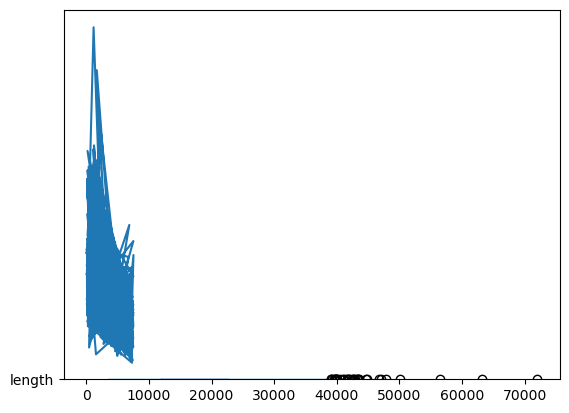

In [22]:
df['length'].plot()
df['length'].plot(kind='box', vert=False)

<Axes: ylabel='Frequency'>

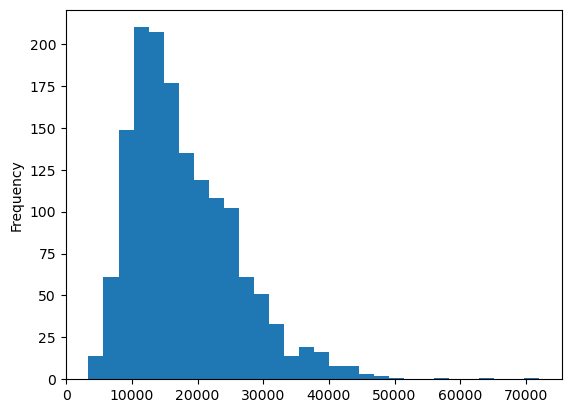

In [23]:
df['length'].plot(kind='hist', bins=30)

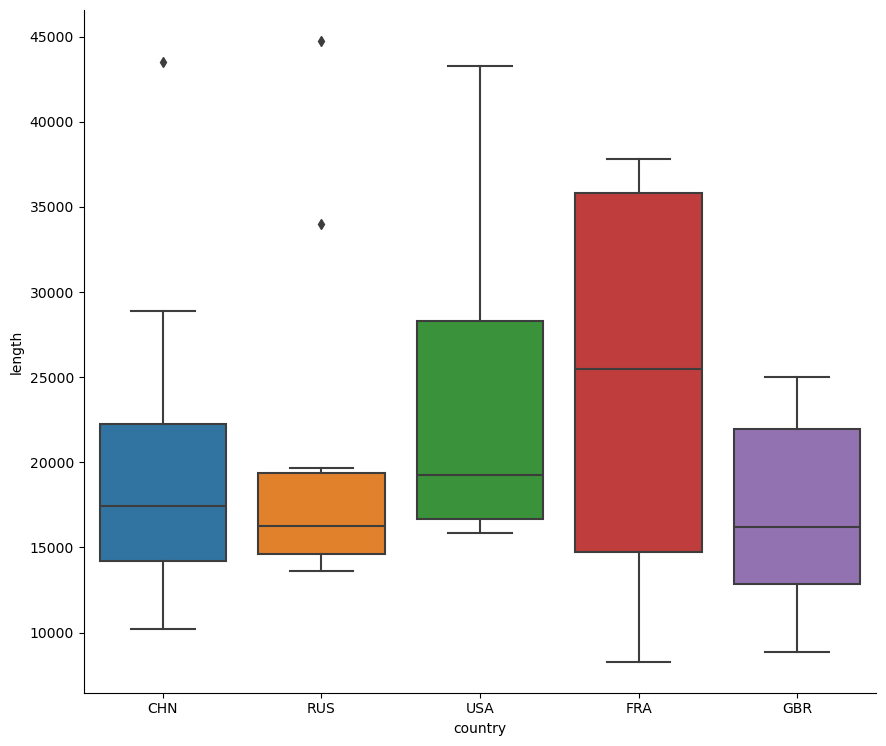

In [24]:
import seaborn as sns 
where = df['country'].isin(['USA', 'FRA', 'GBR', 'CHN', 'RUS'])
g = sns.catplot(data=df[where], x="country", y="length", kind='box')
g.fig.set_size_inches(10, 8) 

In [25]:
import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

In [26]:
testtext = "Let's defeat SARS-CoV-2 together in 2020! www.cdc.gov"
testtokens = tokenize(testtext)
 
print(testtokens)

['Let', 's', 'defeat', 'SARS-CoV-2', 'together', 'in', 'www', 'cdc', 'gov']


In [27]:
import nltk 
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'such', "won't", 'about', 'when', 'same', 'should', 'mustn', 'while', 'is', 're', 'what', 'was', 'in', 'you', 'couldn', 'most', 'other', 'him', 'himself', 'during', 'under', "that'll", 'to', 'than', 'isn', 'of', 'can', 'own', "haven't", 'been', 'our', 'any', 'from', "isn't", 'they', 'am', "didn't", 'o', 'her', 'hadn', 'them', 'had', 'my', 'yourself', "shan't", 's', "it's", 'itself', 'it', 'below', "doesn't", "hasn't", 'shouldn', 'each', 'ma', "you're", 'a', "don't", 'these', "hadn't", 'myself', 'out', 'against', 'after', 'we', 'doesn', 'll', 'few', 'only', 'd', "wouldn't", "you'd", 'your', "wasn't", 'so', 'above', 'if', 't', 'on', 'at', 'before', 'their', "you'll", "weren't", 'having', 'ourselves', 'were', 'into', "needn't", 'y', 'up', 'do', 'aren', 'his', 'through', 'which', 'the', 'down', 'then', 'that', "mustn't", 'all', 'needn', 'very', 'ain', 'why', "you've", 'too', 'between', 'or', 'there', "couldn't", 'have', 'weren', 'she', 'no', 'themselves', 'mightn', "mightn't", "she's", 'w

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kirtanpatel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
#Just testing it
cleantokens= remove_stop(testtokens)
print(cleantokens)

['Let', 'defeat', 'SARS-CoV-2', 'together', 'www', 'cdc', 'gov']


In [29]:
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens

In [30]:
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

In [31]:
df['num_tokens'] = df['tokens'].map(len)
df.tail()

,session,year,country,country_name,speaker,position,text,length,tokens,num_tokens
4481,55,2000,BOL,"Bolivia, Plurinational State of",FERNANDO MESSMER TRIGO,MINISTER FOR FOREIGN AFFAIRS,THE GOVERNMENT OF BOLIVIA HAS GIVEN ME THE TAS...,10449,"[government, bolivia, given, task, conveying, ...",851
1501,36,1981,POL,Poland,MR. CZYREK,UNKNOWN,WE SHOULD LIKE THE PRESIDENT TO ACCEPT OUR SI...,19562,"[like, president, accept, sincere, congratulat...",1602
2997,46,1991,NLD,Netherlands,VAN DEN BROEK,UNKNOWN,﻿I HAVE THE HONOUR TO SPEAK ON BEHALF OF THE E...,27994,"[honour, speak, behalf, european, community, m...",2391
3781,51,1996,CZE,Czechia,JOSEF ZIELENIEC,DEPUTY PRIME MINISTER,﻿LET ME CONGRATULATE\nAMBASSADOR RAZALI ON HIS...,14531,"[let, congratulate, ambassador, razali, electi...",1228
1944,39,1984,PHL,Philippines,TOLENTINO,UNKNOWN,﻿ALLOW ME TO CONGRATULATE THE PRESIDENT ON HIS...,15266,"[allow, congratulate, president, election, cha...",1286


In [33]:
from collections import Counter

tokens = tokenize("Password123!, Coffee break at 10:00 AM, Please RSVP by May 1st, Order #789456 completed, 404 Page Not Found")

testcount= Counter(tokens)
print(testcount)

Counter({'Password123': 1, 'Coffee': 1, 'break': 1, 'at': 1, 'AM': 1, 'Please': 1, 'RSVP': 1, 'by': 1, 'May': 1, '1st': 1, 'Order': 1, 'completed': 1, 'Page': 1, 'Not': 1, 'Found': 1})


In [34]:
more_tokens = tokenize("Emergency contact: 555-123-4567")
testcount.update(more_tokens)
print(testcount)

Counter({'Password123': 1, 'Coffee': 1, 'break': 1, 'at': 1, 'AM': 1, 'Please': 1, 'RSVP': 1, 'by': 1, 'May': 1, '1st': 1, 'Order': 1, 'completed': 1, 'Page': 1, 'Not': 1, 'Found': 1, 'Emergency': 1, 'contact': 1})


In [35]:
counter = Counter()
df['tokens'].map(counter.update)
print(counter.most_common(5))

[('nations', 24783), ('united', 23855), ('international', 23219), ('world', 17920), ('countries', 16855)]


In [36]:
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'

In [37]:
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
nations,24783
united,23855
international,23219
world,17920
countries,16855
peace,14684
development,12090
people,12078
states,11854


In [38]:
freq_df.describe()

,freq
count,36027.000000
mean,61.666722
std,422.272091
min,1.000000
25%,1.000000
50%,3.000000
75%,15.000000
max,24783.000000


[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

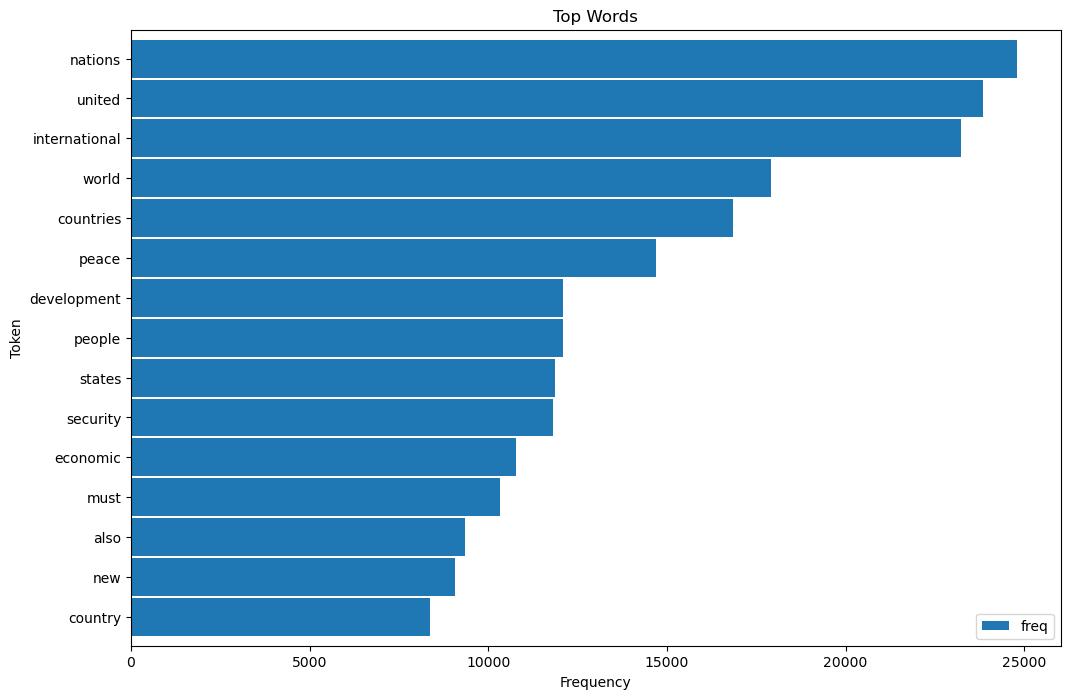

In [39]:
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(12,8))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

(-0.5, 399.5, 199.5, -0.5)

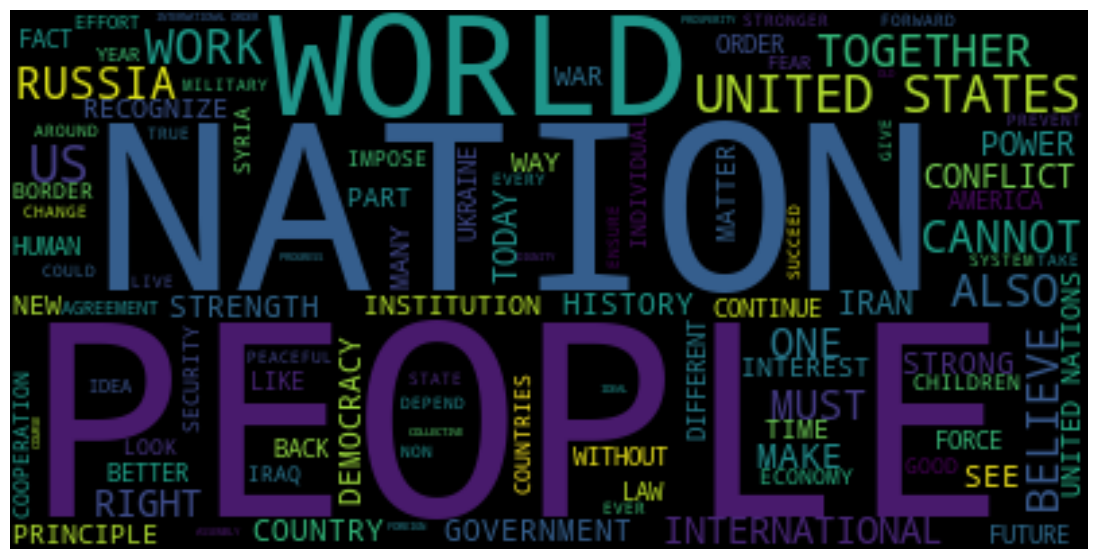

In [45]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

text = df.query("year==2015 and country=='USA'")['text'].values[0]

plt.figure(figsize=(14, 7)) ###
wc = WordCloud(max_words=100, stopwords=stopwords)
wc.generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

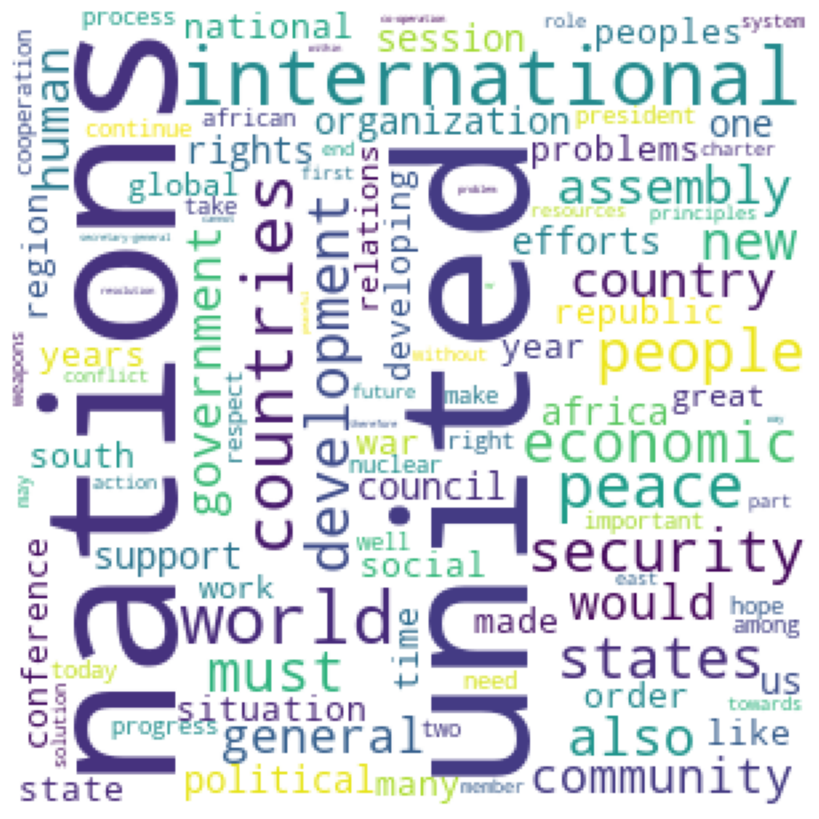

In [46]:
wc = WordCloud(background_color='white', width = 300, height=300, max_words=100, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

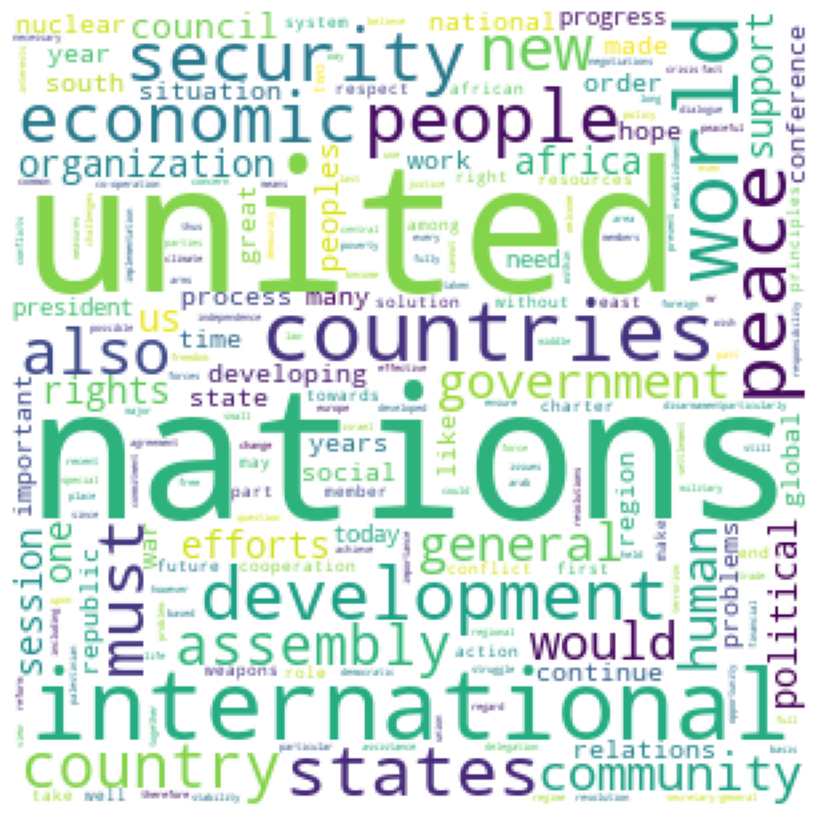

In [55]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [73]:
import nltk 
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'such', "won't", 'about', 'when', 'same', 'should', 'mustn', 'while', 'is', 're', 'what', 'was', 'in', 'you', 'couldn', 'most', 'other', 'him', 'himself', 'during', 'under', "that'll", 'to', 'than', 'isn', 'of', 'can', 'own', "haven't", 'been', 'our', 'any', 'from', "isn't", 'they', 'am', "didn't", 'o', 'her', 'hadn', 'them', 'had', 'my', 'yourself', "shan't", 's', "it's", 'itself', 'it', 'below', "doesn't", "hasn't", 'shouldn', 'each', 'ma', "you're", 'a', "don't", 'these', "hadn't", 'myself', 'out', 'against', 'after', 'we', 'doesn', 'll', 'few', 'only', 'd', "wouldn't", "you'd", 'your', "wasn't", 'so', 'above', 'if', 't', 'on', 'at', 'before', 'their', "you'll", "weren't", 'having', 'ourselves', 'were', 'into', "needn't", 'y', 'up', 'do', 'aren', 'his', 'through', 'which', 'the', 'down', 'then', 'that', "mustn't", 'all', 'needn', 'very', 'ain', 'why', "you've", 'too', 'between', 'or', 'there', "couldn't", 'have', 'weren', 'she', 'no', 'themselves', 'mightn', "mightn't", "she's", 'w

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kirtanpatel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [74]:
import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

In [76]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
nations,24783
united,23855
international,23219
world,17920
countries,16855
peace,14684
development,12090
people,12078
states,11854


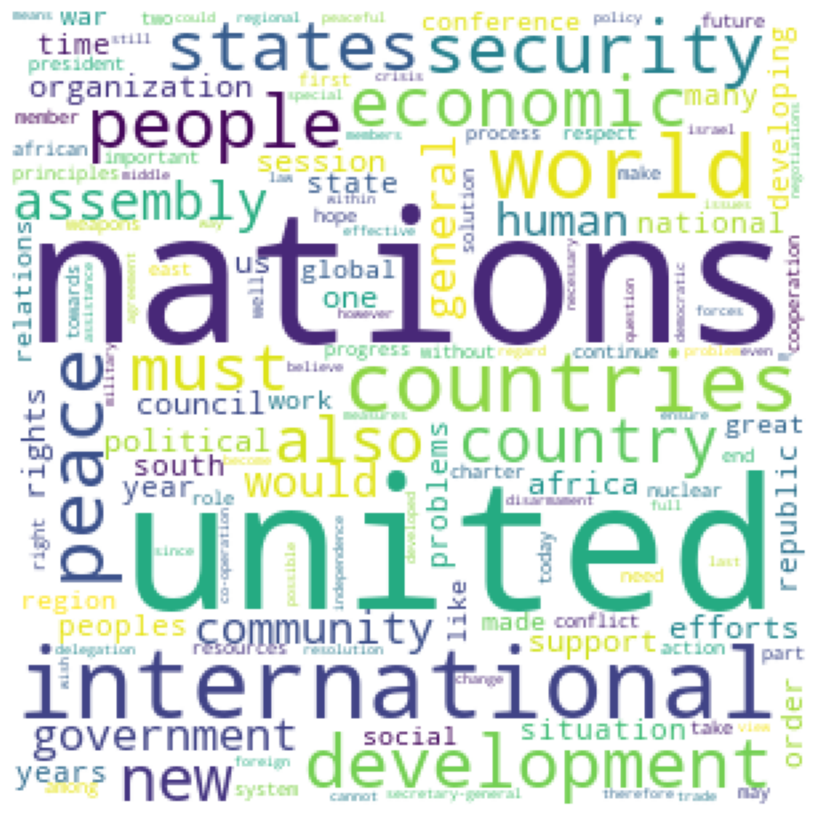

In [77]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [78]:
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    # count tokens
    counter = Counter()
    df[column].map(update)
    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)

In [79]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

,freq,tfidf
token,,
nations,24783,2494.816495
united,23855,2449.155808
international,23219,2523.873170
world,17920,1911.786542
countries,16855,2198.542651


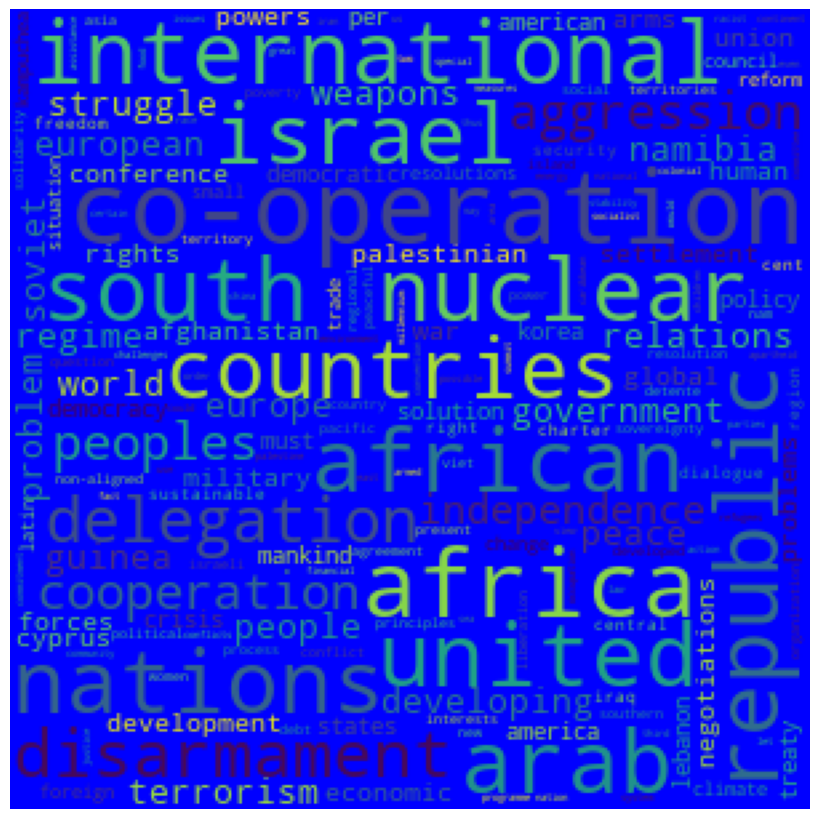

In [80]:
wc = WordCloud(background_color='blue', width = 300, height=300, margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [81]:
df['num_tokens'] = df['tokens'].map(len)

def count_keywords(tokens, keywords): 
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

In [82]:
def count_keywords_by(df, by, keywords, column='tokens'):
    
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps in the index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    
    return freq_df.groupby(by=by).sum().sort_values(by)

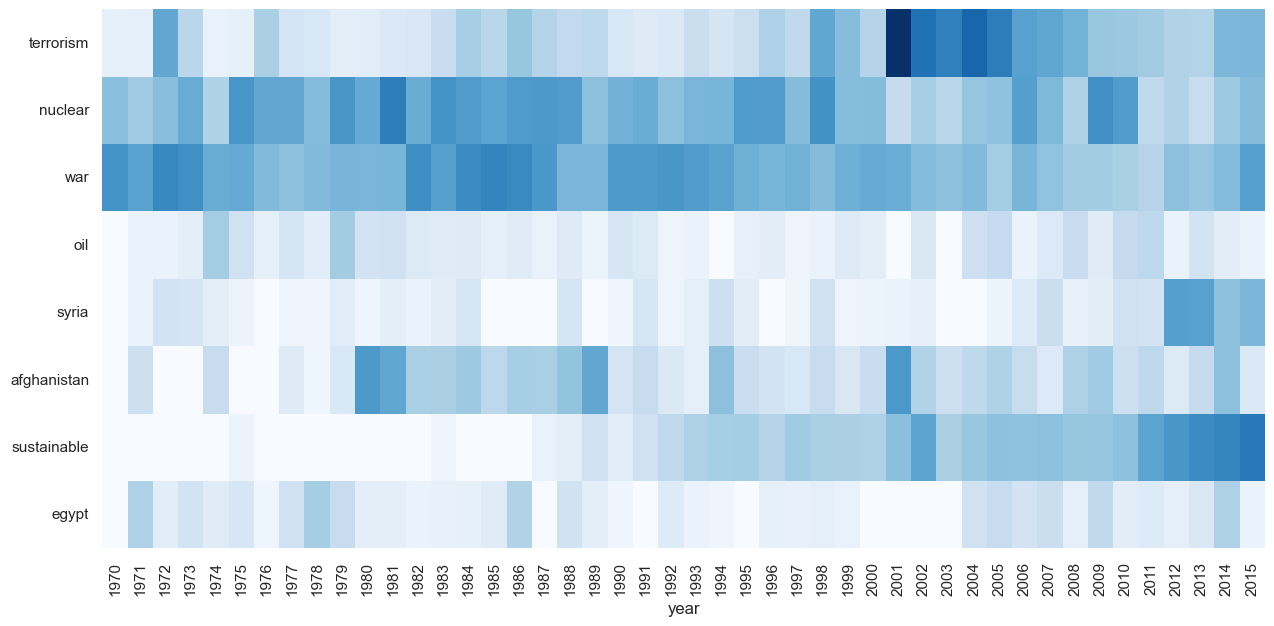

In [85]:
import seaborn as sns
keywords = ['terrorism', 'nuclear', 'war', 'oil',
            'syria', 'afghanistan', 'sustainable','egypt']  
freq_df = count_keywords_by(df, by='year', keywords=keywords)
# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('year')['num_tokens'].sum(), axis=0)
# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(15, 7)) 
sns.set(font_scale=1) 
sns.heatmap(data=freq_df.T, 
            xticklabels=True, yticklabels=True, cbar=False, cmap="Blues")
sns.set(font_scale=1)

In [86]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="Hv5lnPVXbNT1Izgi74bz5Q",
    client_secret="cy7hWmkO_idXrneZP_3k6YGx_JQIvw",
    user_agent=user_agent
)

In [87]:
import pandas as pd
import numpy as np
import re 

In [88]:
headlines = set()
for submission in reddit.subreddit("NFL").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

2024 NFL Draft Hub
1cd0718
nfl_gdt_bot
1714073273.0
658
0.9
https://www.reddit.com/r/nfl/comments/1cd0718/2024_nfl_draft_hub/
0


In [91]:
headlines = set()
for submission in reddit.subreddit("NFL").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

801


In [92]:
#Create a dataframe from the scrapped data 
NFL_df = pd.DataFrame(headlines)
NFL_df.head()

,0
0,"""On the day before Super Bowl XXII, Williams h..."
1,[Louis-Jacques] Chris Grier on how Dolphins HC...
2,"[McMullen] ""He'll have a great role in this of..."
3,[Coach Yac] Brandon Aiyuk’s IG story after see...
4,"Round 4 - Pick 30: T.J. Tampa, CB, Iowa St (Ba..."


In [93]:
NFL_df.columns

RangeIndex(start=0, stop=1, step=1)

In [94]:
NFL_df.columns = ['Titles']

In [95]:
NFL_df.head()

,Titles
0,"""On the day before Super Bowl XXII, Williams h..."
1,[Louis-Jacques] Chris Grier on how Dolphins HC...
2,"[McMullen] ""He'll have a great role in this of..."
3,[Coach Yac] Brandon Aiyuk’s IG story after see...
4,"Round 4 - Pick 30: T.J. Tampa, CB, Iowa St (Ba..."


In [96]:
NFL_df.Titles.duplicated().sum() 

0

In [97]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

NFL_df["Titles"]= NFL_df["Titles"].apply(cleanTxt)

NFL_df.head()

,Titles
0,"""On the day before Super Bowl XXII, Williams h..."
1,[Louis-Jacques] Chris Grier on how Dolphins HC...
2,"[McMullen] ""He'll have a great role in this of..."
3,[Coach Yac] Brandon Aiyuk’s IG story after see...
4,"Round 4 - Pick 30 T.J. Tampa, CB, Iowa St (Bal..."


In [98]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F" 
                               u"\U0001F300-\U0001F5FF"  
                               u"\U0001F680-\U0001F6FF" 
                               u"\U0001F1E0-\U0001F1FF"  
                               u"\U00002500-\U00002BEF"  
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

NFL_df["Titles"]= NFL_df["Titles"].apply(remove_emoji)

NFL_df.head()

,Titles
0,"""On the day before Super Bowl XXII, Williams h..."
1,[Louis-Jacques] Chris Grier on how Dolphins HC...
2,"[McMullen] ""He'll have a great role in this of..."
3,[Coach Yac] Brandon Aiyuk’s IG story after see...
4,"Round 4 - Pick 30 T.J. Tampa, CB, Iowa St (Bal..."


In [99]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [100]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

NFL_df['Subjectivity'] = NFL_df['Titles'].apply(getSubjectivity)
NFL_df['Polarity'] = NFL_df['Titles'].apply(getPolarity)

NFL_df.head()

,Titles,Subjectivity,Polarity
0,"""On the day before Super Bowl XXII, Williams h...",0.666667,0.333333
1,[Louis-Jacques] Chris Grier on how Dolphins HC...,0.403333,0.195000
2,"[McMullen] ""He'll have a great role in this of...",0.437500,0.300000
3,[Coach Yac] Brandon Aiyuk’s IG story after see...,0.000000,0.000000
4,"Round 4 - Pick 30 T.J. Tampa, CB, Iowa St (Bal...",0.400000,-0.200000


In [102]:
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
NFL_df["Insight"] = NFL_df["Polarity"].apply(getInsight)

NFL_df.head(100)

,Titles,Subjectivity,Polarity,Insight
0,"""On the day before Super Bowl XXII, Williams h...",0.666667,0.333333,Positive
1,[Louis-Jacques] Chris Grier on how Dolphins HC...,0.403333,0.195000,Positive
2,"[McMullen] ""He'll have a great role in this of...",0.437500,0.300000,Positive
3,[Coach Yac] Brandon Aiyuk’s IG story after see...,0.000000,0.000000,Neutral
4,"Round 4 - Pick 30 T.J. Tampa, CB, Iowa St (Bal...",0.400000,-0.200000,Negative
...,...,...,...,...
95,The Worst Decision Your Team Has Ever Made?,1.000000,-1.000000,Negative
96,How is Marty Schottenheimer not in the NFL Hal...,0.000000,0.000000,Neutral
97,[Rapoport] Sources The Lions have a deal for o...,0.466667,0.366667,Positive
98,Where does Patrick Mahomes rank within the top...,0.700000,-0.150000,Negative


In [103]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

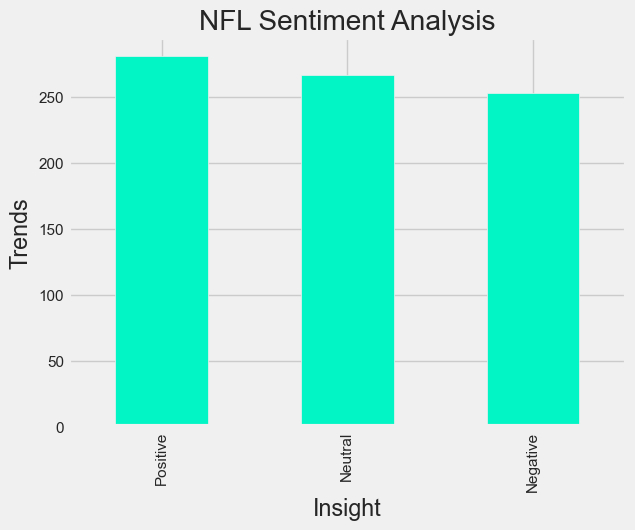

In [104]:
plt.title("NFL Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Trends")
plt.rcParams["figure.figsize"] = (10,8)
NFL_df["Insight"].value_counts().plot(kind="bar", color="#02f5c4")
plt.show()

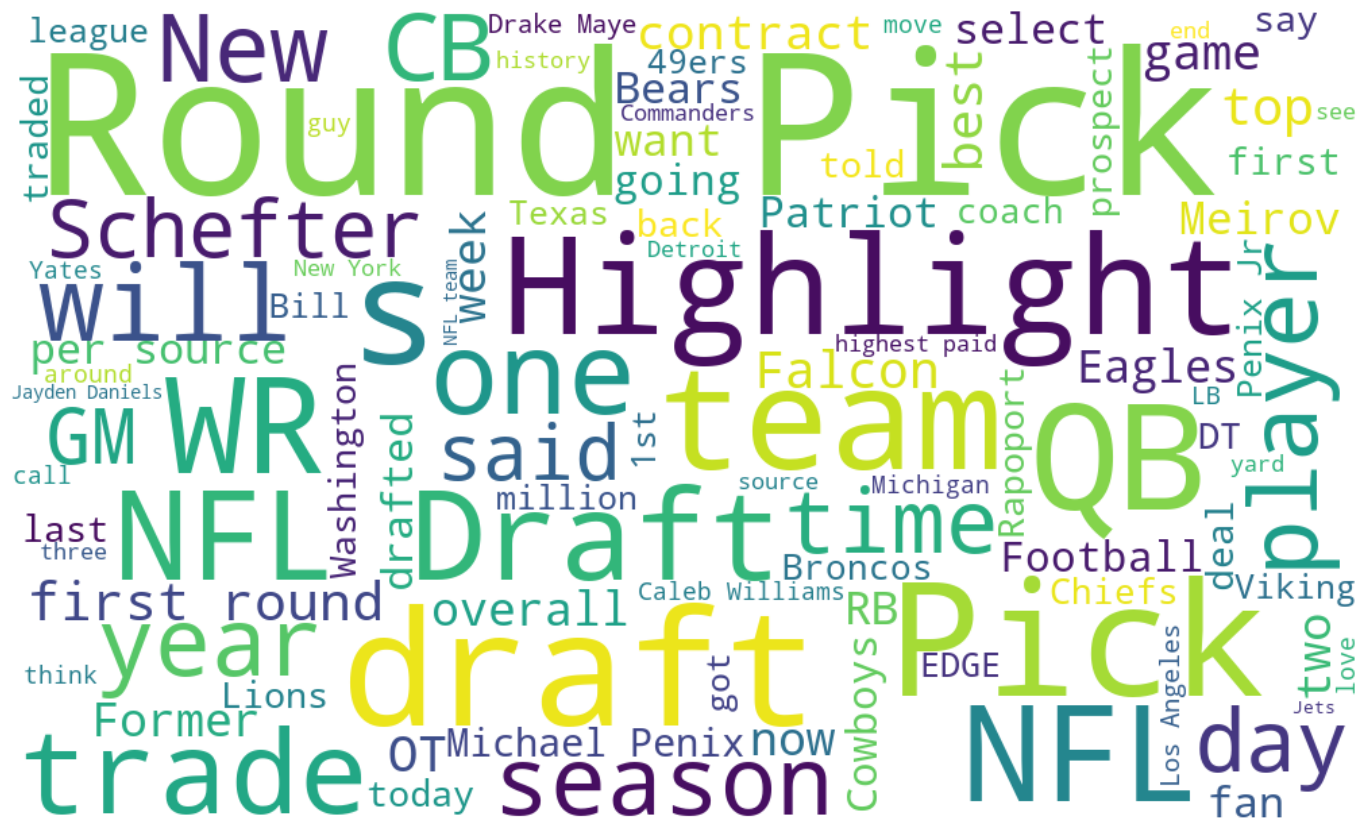

In [107]:
text = ' '.join([title for title in NFL_df['Titles']])

wordcloud = WordCloud(width=1000, height=600,
                      max_words=100,
                      stopwords=STOPWORDS,
                      background_color="white").generate(text)

plt.figure(figsize=(20,10), facecolor='w')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()